In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [4]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

C:\Users\jk113\Anaconda3\envs\ML GPU\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jk113\Anaconda3\envs\ML GPU\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


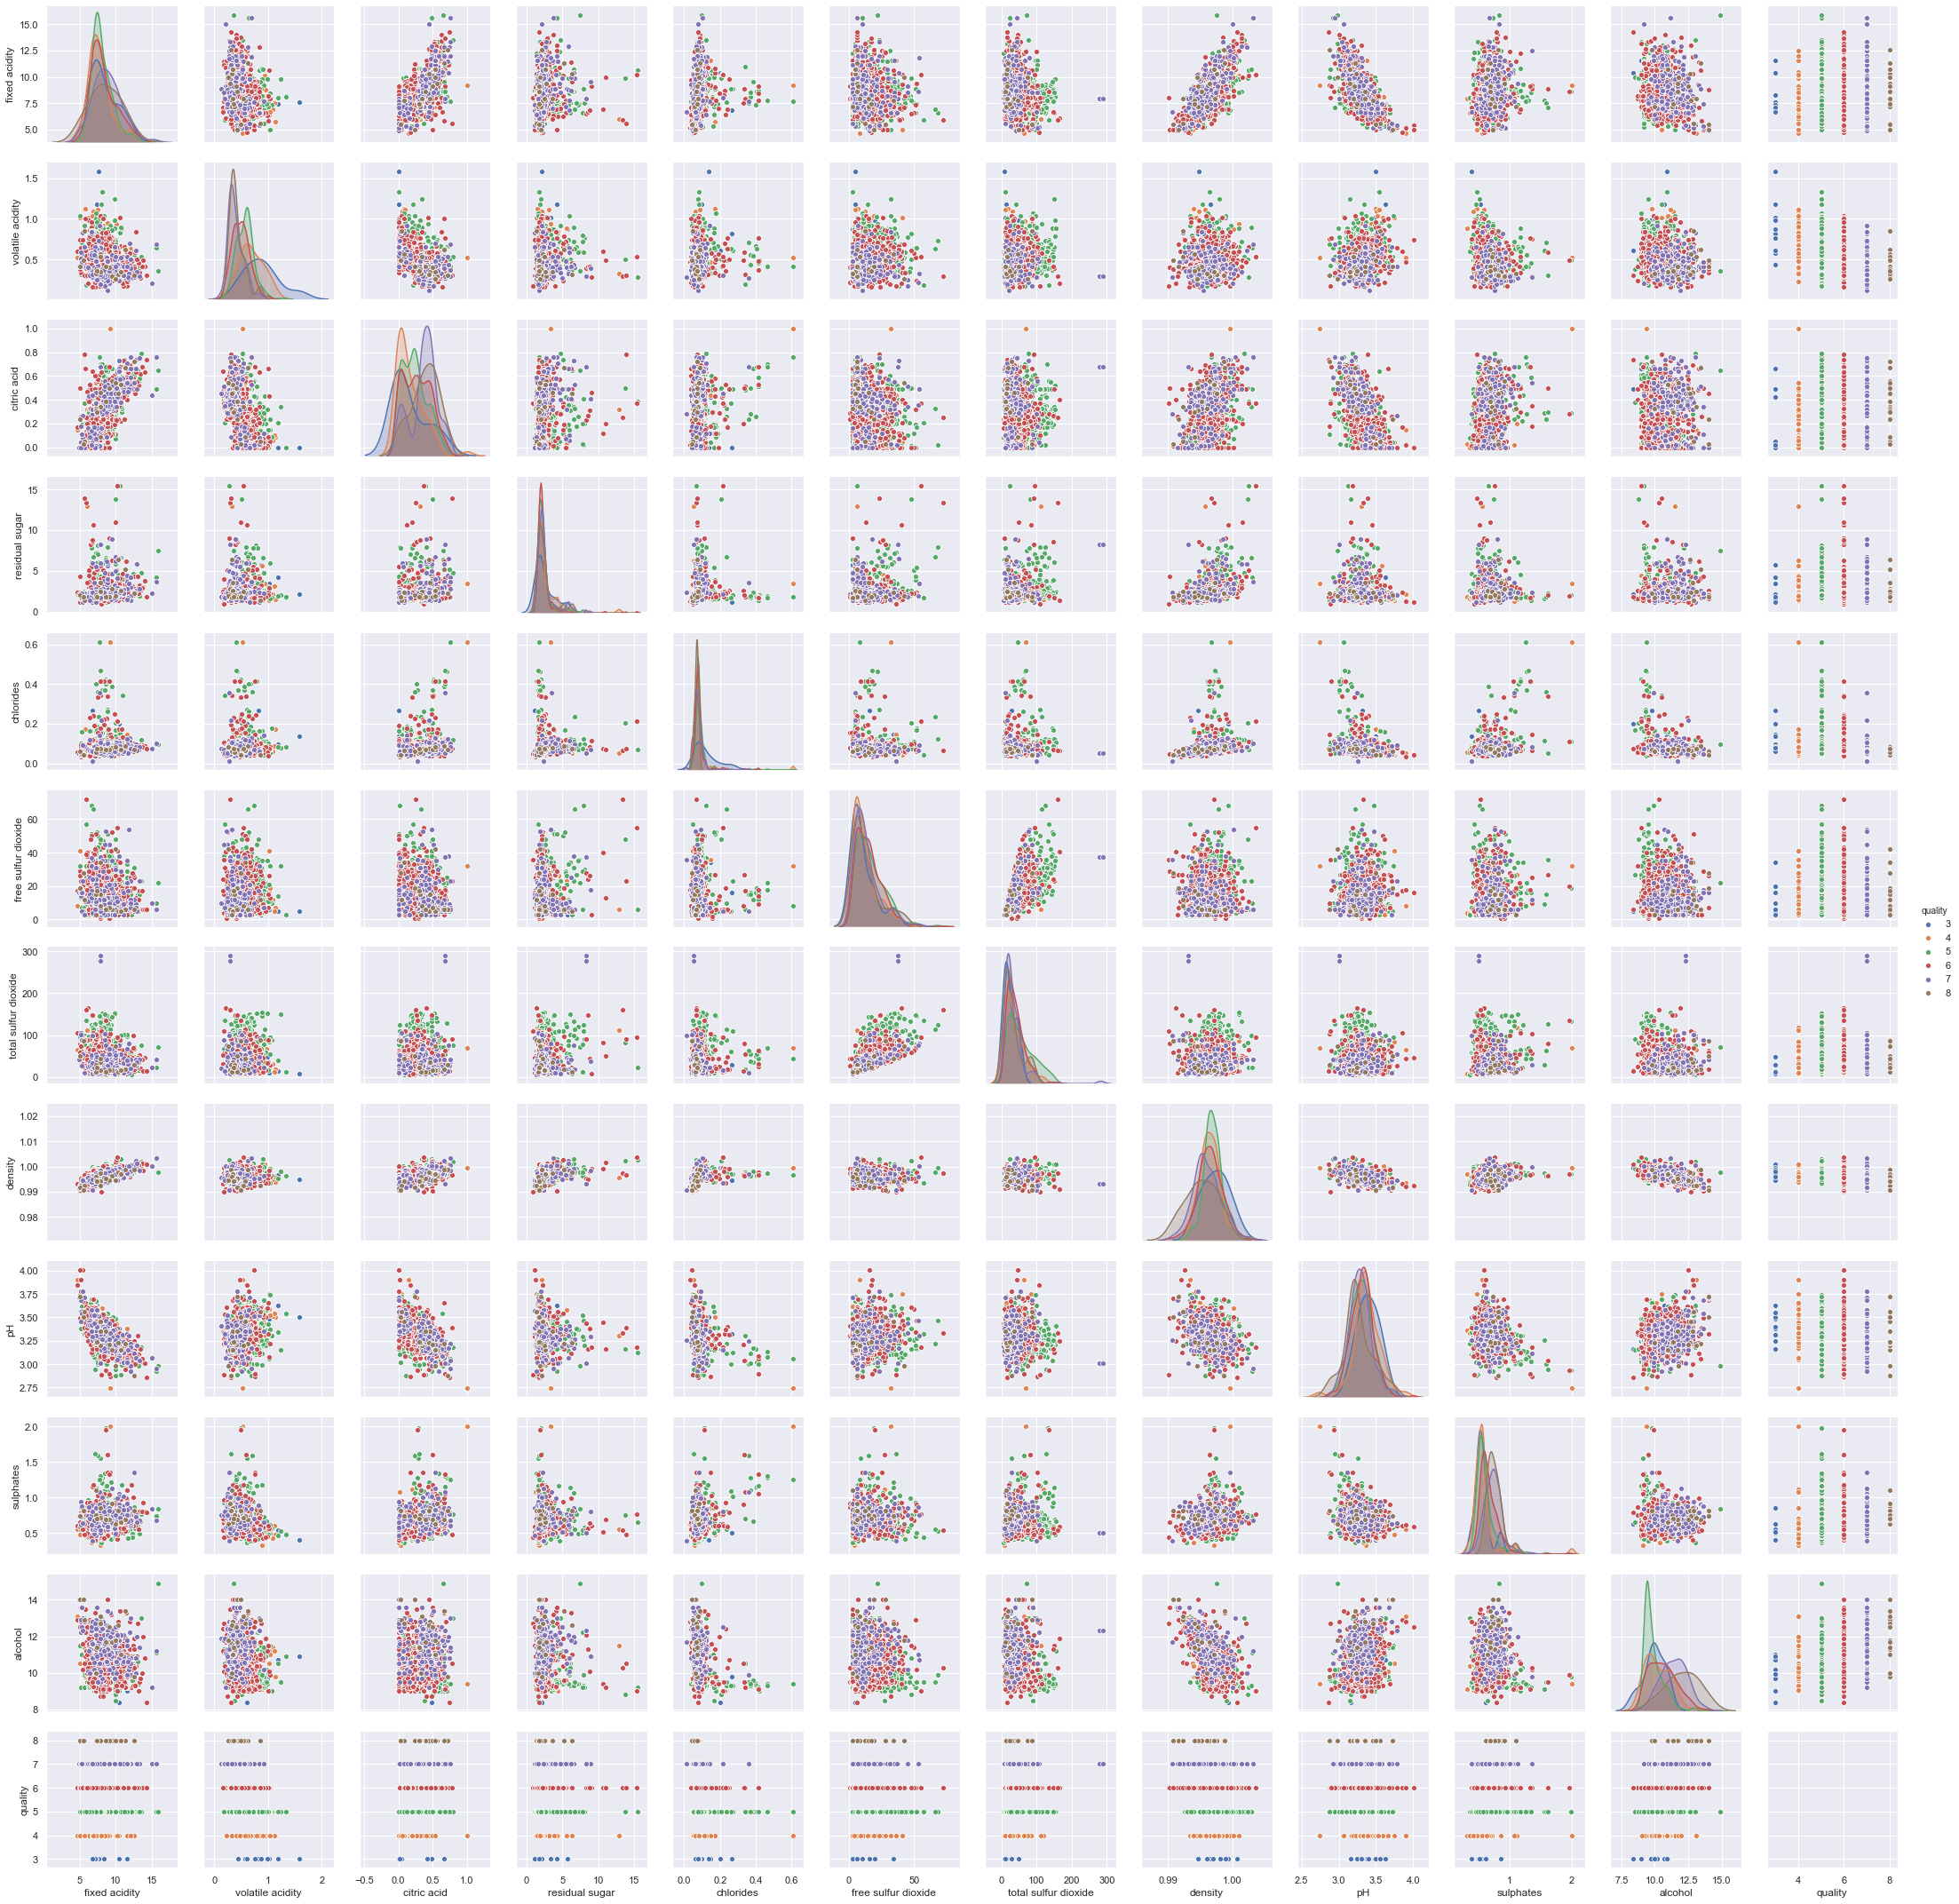

In [6]:
sns.set()
#%matplotlib qt
_ = sns.pairplot(wine_data,hue='quality')

In [7]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

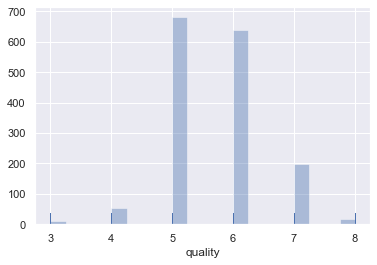

In [8]:
_ = sns.distplot(wine_data['quality'],bins=20,kde=False, rug=True)

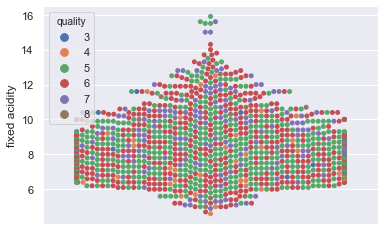

In [9]:
%matplotlib inline
plt.figure()
_= sns.swarmplot(y='fixed acidity',x=['']*len(wine_data['quality']),data=wine_data,hue='quality')

In [10]:
Target = wine_data['quality']
Features = wine_data.iloc[:,0:11]
Features

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [11]:
stdscaler = StandardScaler()
##mmscaler = MinMaxScaler()
Features = pd.DataFrame(stdscaler.fit_transform(Features),columns=Features.columns)

C:\Users\jk113\Anaconda3\envs\ML GPU\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jk113\Anaconda3\envs\ML GPU\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


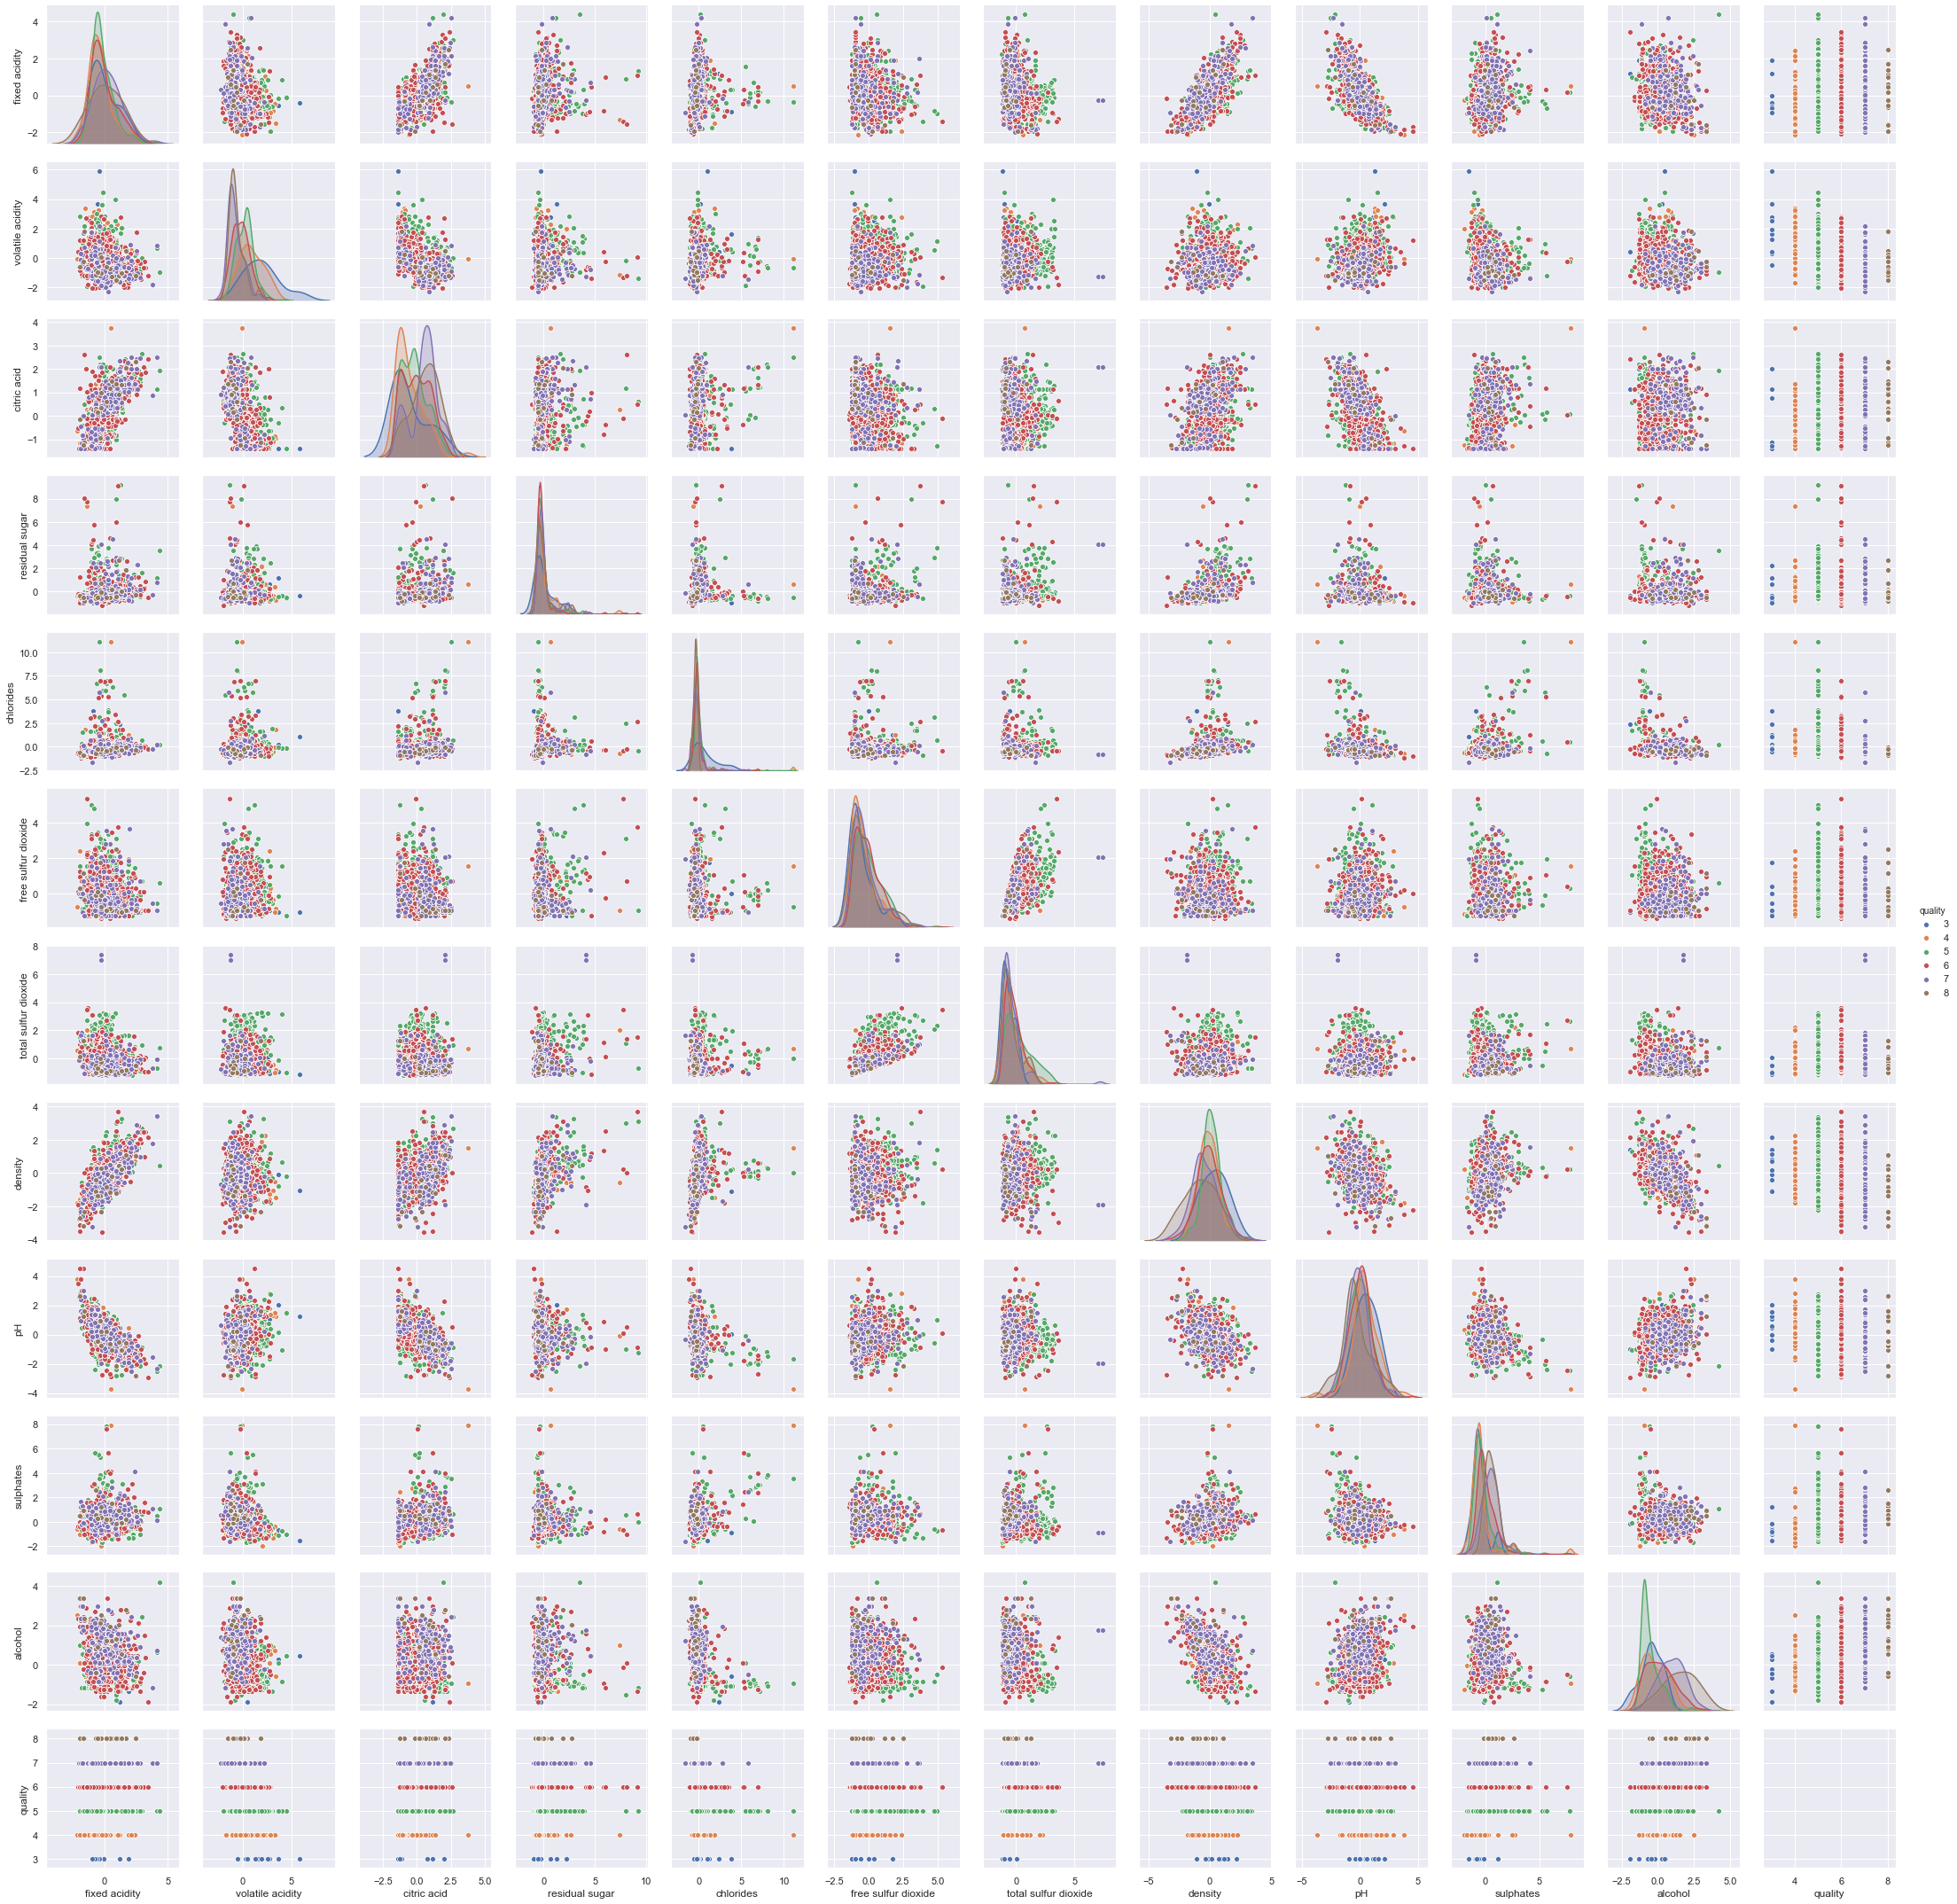

In [12]:
grphout = pd.concat([Features,Target],axis=1)
_ = sns.pairplot(grphout,hue='quality')

### Feature Importance

In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
FS_X = wine_data.iloc[:,0:11]
FS_y = Target
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(FS_X,FS_y)

Kbestscores = pd.DataFrame(fit.scores_)
Kbestparam = pd.DataFrame(FS_X.columns)
KbestfeatureScores = pd.concat([Kbestparam,Kbestscores],axis=1)
KbestfeatureScores.columns = ['Param','Score']
KbestfeatureScores = KbestfeatureScores.sort_values(by=['Score'],ascending=False)

_ = sns.barplot(x='Score',y='Param',data=KbestfeatureScores)
Feature_Set1 = KbestfeatureScores['Param'][0:4]
Feature_Set1 = pd.Series.tolist(Feature_Set1)
Feature_Set1

NameError: name 'wine_data' is not defined

C:\Users\jk113\Anaconda3\envs\ML GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jk113\Anaconda3\envs\ML GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density'] ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'citric acid']


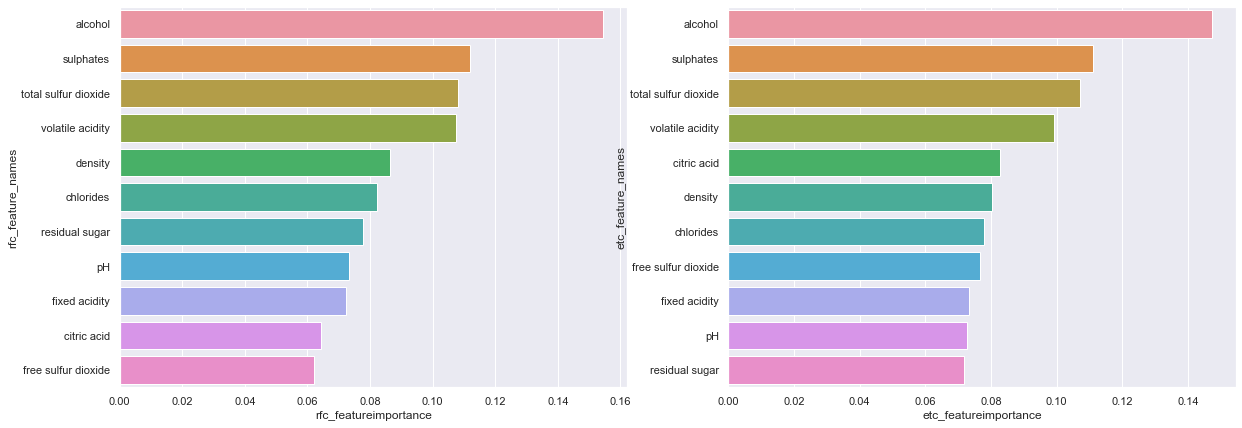

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
rfc = RandomForestClassifier()
rfc.fit(FS_X,FS_y)
rfc_featureimportance = pd.DataFrame(rfc.feature_importances_,columns=['rfc_featureimportance'])
rfc_feature_names = pd.DataFrame(FS_X.columns,columns=['rfc_feature_names'])
rfcfeature_df = pd.concat([rfc_featureimportance,rfc_feature_names],axis=1)
rfcfeature_df = rfcfeature_df.sort_values(by=['rfc_featureimportance'],ascending=False)

etc=ExtraTreesClassifier()
etc.fit(FS_X,FS_y)
etc_featureimportance = pd.DataFrame(etc.feature_importances_,columns=['etc_featureimportance'])
etc_feature_names=pd.DataFrame(FS_X.columns,columns=['etc_feature_names'])
etc_feature_df = pd.concat([etc_featureimportance,etc_feature_names],axis=1)
etc_feature_df= etc_feature_df.sort_values(by=['etc_featureimportance'],ascending=False)

f,axes=plt.subplots(1,2,figsize=(20,7))
axes=axes.flatten()
_ = sns.barplot(x='rfc_featureimportance',y='rfc_feature_names',data=rfcfeature_df,ax=axes[0])    
_ = sns.barplot(x='etc_featureimportance',y='etc_feature_names',data=etc_feature_df,ax=axes[1]) 

Feature_Set2 = rfcfeature_df['rfc_feature_names'][0:5]
Feature_Set2 = pd.Series.tolist(Feature_Set2)

Feature_Set3 = etc_feature_df['etc_feature_names'][0:5]
Feature_Set3 = pd.Series.tolist(Feature_Set3)
print(Feature_Set2, Feature_Set3)

['fixed acidity', 'volatile acidity']


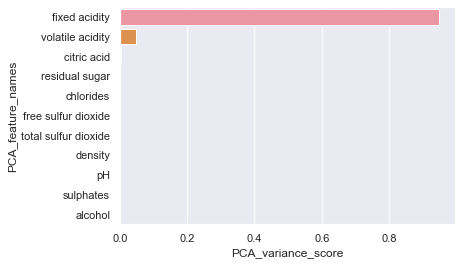

In [15]:
from sklearn.decomposition import PCA 
    
pca = PCA()
FS_PCAfeatures = pca.fit_transform(FS_X)
PCA_variance_score =pd.DataFrame(pca.explained_variance_ratio_,columns=['PCA_variance_score'])
PCA_feature_names = pd.DataFrame(FS_X.columns,columns=['PCA_feature_names'])
PCA_variance_df = pd.concat([PCA_variance_score,PCA_feature_names],axis=1)
PCA_variance_df = PCA_variance_df.sort_values(by=['PCA_variance_score'],ascending= False)

_ = sns.barplot(x='PCA_variance_score',y='PCA_feature_names',data=PCA_variance_df)
Feature_Set4 = PCA_variance_df['PCA_feature_names'][0:2]
Feature_Set4 = pd.Series.tolist(Feature_Set4)
print(Feature_Set4)

['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'residual sugar']


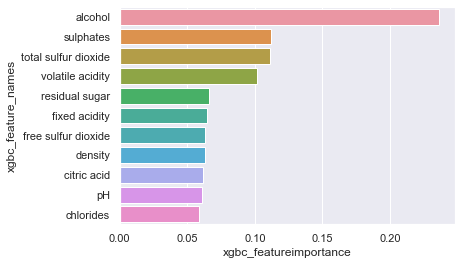

In [16]:
from xgboost import XGBClassifier

xgbc=XGBClassifier()
xgbc.fit(FS_X,FS_y)
xgbc_featureimportance = pd.DataFrame(xgbc.feature_importances_,columns=['xgbc_featureimportance'])
xgbc_feature_names = pd.DataFrame(FS_X.columns,columns=['xgbc_feature_names'])
xgbc_feature_df = pd.concat([xgbc_featureimportance,xgbc_feature_names],axis=1)
xgbc_feature_df= xgbc_feature_df.sort_values(by=['xgbc_featureimportance'],ascending=False)

_ = sns.barplot(x='xgbc_featureimportance',y='xgbc_feature_names',data=xgbc_feature_df)
Feature_Set5 = xgbc_feature_df['xgbc_feature_names'][0:4]
Feature_Set5 = pd.Series.tolist(Feature_Set5)
print(Feature_Set5)

Feature_Set6 = xgbc_feature_df['xgbc_feature_names'][0:5]
Feature_Set6 = pd.Series.tolist(Feature_Set6)
print(Feature_Set6)


['alcohol', 'fixed acidity', 'free sulfur dioxide']


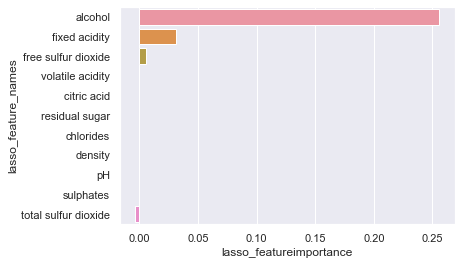

In [17]:
from sklearn.linear_model import Lasso 

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(FS_X,FS_y)
lasso_reg_featureimportance=pd.DataFrame(lasso_reg.coef_,columns=['lasso_featureimportance'])
lasso_reg_feature_names = pd.DataFrame(FS_X.columns,columns=['lasso_feature_names'])
lasso_reg_feature_df = pd.concat([lasso_reg_featureimportance,lasso_reg_feature_names],axis=1)
lasso_reg_feature_df = lasso_reg_feature_df.sort_values(by=['lasso_featureimportance'],ascending=False)

_ = sns.barplot(x='lasso_featureimportance',y='lasso_feature_names',data=lasso_reg_feature_df)
Feature_Set7 = lasso_reg_feature_df['lasso_feature_names'][0:3]
Feature_Set7 = pd.Series.tolist(Feature_Set7)
print(Feature_Set7)

In [18]:
Feature_Set_List = [Feature_Set1,Feature_Set2,Feature_Set3,Feature_Set4,Feature_Set5,Feature_Set6,Feature_Set7]
Feature_Set_List
#for i in Feature_Set_List:
 #   Features_test=Features[i]
  #  print(Features_test)

[['total sulfur dioxide',
  'free sulfur dioxide',
  'alcohol',
  'volatile acidity'],
 ['alcohol',
  'sulphates',
  'total sulfur dioxide',
  'volatile acidity',
  'density'],
 ['alcohol',
  'sulphates',
  'total sulfur dioxide',
  'volatile acidity',
  'citric acid'],
 ['fixed acidity', 'volatile acidity'],
 ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity'],
 ['alcohol',
  'sulphates',
  'total sulfur dioxide',
  'volatile acidity',
  'residual sugar'],
 ['alcohol', 'fixed acidity', 'free sulfur dioxide']]

### Servere Class Imbalance
Does SMOTE Improve Classification?

SMOTE Implementation

In [19]:
training_score_results_sm=[]
test_score_results_sm=[]

for i in Feature_Set_List:
    sm=SMOTE('minority',random_state=24)
    X_train,X_test,y_train,y_test=train_test_split(Features[i],Target,random_state=24,test_size=0.3,stratify=Target)
    X_sm,y_sm= sm.fit_sample(X_train,y_train)
    X_sm2,y_sm2= sm.fit_sample(X_sm,y_sm)
    
    knn_sm = KNeighborsClassifier(n_neighbors=3)
    knn_sm.fit(X_sm2,y_sm2)
    
    training_accuracy_sm=knn_sm.score(X_sm2,y_sm2)
    training_score_results_sm.append(training_accuracy_sm)
    
    test_accuracy_sm=knn_sm.score(X_test, y_test)
    test_score_results_sm.append(test_accuracy_sm)

In [20]:
training_score_results=[]
test_score_results=[]

for i in Feature_Set_List:
    X_train,X_test,y_train,y_test=train_test_split(Features[i],Target,random_state=24,test_size=0.3,stratify=Target)
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    training_accuracy=knn.score(X_train,y_train)
    training_score_results.append(training_accuracy)
    
    test_accuracy=knn.score(X_test, y_test)
    test_score_results.append(test_accuracy)

In [21]:
training_score_results_sm = pd.DataFrame(training_score_results_sm,columns=['Training Score_sm'])
test_score_results_sm = pd.DataFrame(test_score_results_sm,columns=['Test Score_sm'])
knn_3_results_sm = pd.concat([training_score_results_sm,test_score_results_sm],axis=1)
knn_3_results_sm['Difference'] = knn_3_results_sm['Training Score_sm'] - knn_3_results_sm['Test Score_sm']
knn_3_results_sm

Training Score_sm  Test Score_sm  Difference
0           0.839747       0.508333    0.331413
1           0.863614       0.552083    0.311531
2           0.866050       0.560417    0.305633
3           0.792012       0.395833    0.396178
4           0.869459       0.562500    0.306959
5           0.873843       0.537500    0.336343
6           0.832440       0.489583    0.342857

In [22]:
training_score_results = pd.DataFrame(training_score_results,columns=['Training Score'])
test_score_results = pd.DataFrame(test_score_results,columns=['Test Score'])
knn_3_results = pd.concat([training_score_results,test_score_results],axis=1)
knn_3_results['Difference'] = knn_3_results['Training Score'] - knn_3_results['Test Score']
knn_3_results

Training Score  Test Score  Difference
0        0.740840    0.543750    0.197090
1        0.770331    0.587500    0.182831
2        0.773012    0.600000    0.173012
3        0.726542    0.500000    0.226542
4        0.780161    0.604167    0.175994
5        0.788204    0.570833    0.217370
6        0.751564    0.547917    0.203647

### Conclusion in application of SMOTE
The overfitting phenomenon is apparent, as the training data set did relatively well while the test data set did significantly worse.
The 2 main suspected cause of servere overfitting:
1. SMOTE did not improve the performance of the model as it could have introduced too many artificial data points (Class 8 from 13 samples to 477 samples, Class 3 from 7 samples to 477 samples)
2. Under SMOTE's the defualt Knn setting of 5 could have also been responsible in creating too large of an artificial sample space

The General performance of model training without SMOTE showed significantly better performance and lesser overfitting as the differences in terms of training vs test results were lesser.
Need to mannually select the SMOTE target class and samples to increase to reduce overfitting.

In [23]:
training_score_results_sm_n3=[]
test_score_results_sm_n3=[]

for i in Feature_Set_List:
    sm=SMOTE({3:30,8:30},random_state=24,k_neighbors=6)
    X_train,X_test,y_train,y_test=train_test_split(Features[i],Target,random_state=24,test_size=0.3,stratify=Target)
    X_sm_n3,y_sm_n3= sm.fit_sample(X_train,y_train)
    
    knn_sm_n3 = KNeighborsClassifier(n_neighbors=3)
    knn_sm_n3.fit(X_sm_n3,y_sm_n3)
    
    training_accuracy_sm_n3=knn_sm_n3.score(X_sm_n3,y_sm_n3)
    training_score_results_sm_n3.append(training_accuracy_sm_n3)
    
    test_accuracy_sm_n3=knn_sm_n3.score(X_test, y_test)
    test_score_results_sm_n3.append(test_accuracy_sm_n3)

In [24]:
training_accuracy_sm_n3 = pd.DataFrame(training_score_results_sm_n3,columns=['Training Score'])
test_score_results_sm_n3 = pd.DataFrame(test_score_results_sm_n3,columns=['Test Score'])
knn_3_results_sm_n3 = pd.concat([training_accuracy_sm_n3,test_score_results_sm_n3],axis=1)
knn_3_results_sm_n3['Difference'] = knn_3_results_sm_n3['Training Score'] - knn_3_results_sm_n3['Test Score']
knn_3_results_sm_n3

Training Score  Test Score  Difference
0        0.742882    0.535417    0.207465
1        0.777394    0.587500    0.189894
2        0.779120    0.591667    0.187453
3        0.716135    0.481250    0.234885
4        0.783434    0.585417    0.198017
5        0.794651    0.554167    0.240484
6        0.747196    0.537500    0.209696

### SMOTE with Controlled Increase in Samples and Smaller N_neighbors


By reducing the N_neighbours only, the overfitting problem still persists to a large degree. Only by mannually specifying the artificial samples to a conservative amount of 30 samples maximum (Both Class 3 and Class 8) did overfitting significantly reduce.

Further reduction of 30 samples is not recommended and also does not improve significantly improve the test score. 

In [25]:
print(knn_3_results)
print(Feature_Set2,Feature_Set3,Feature_Set5,Feature_Set6)
#inclusion of density reduces model performance
#inclusion of residual sugar reduces model performance

   Training Score  Test Score  Difference
0        0.740840    0.543750    0.197090
1        0.770331    0.587500    0.182831
2        0.773012    0.600000    0.173012
3        0.726542    0.500000    0.226542
4        0.780161    0.604167    0.175994
5        0.788204    0.570833    0.217370
6        0.751564    0.547917    0.203647
['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density'] ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'citric acid'] ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity'] ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'residual sugar']


In [26]:
Feature_Set5_2 = ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity','chlorides']

training_score_results_Set5_2=[]
test_score_results_Set5_2=[]

X_train,X_test,y_train,y_test=train_test_split(Features[Feature_Set5_2],Target,random_state=24,test_size=0.3,stratify=Target)
    
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
    
training_accuracy_Set5_2=knn.score(X_train,y_train)
training_score_results_Set5_2.append(training_accuracy_Set5_2)
    
test_accuracy_Set5_2=knn.score(X_test, y_test)
test_score_results_Set5_2.append(test_accuracy_Set5_2)

In [27]:
training_score_results_Set5_2 = pd.DataFrame(training_score_results_Set5_2,columns=['Training Score'])
test_score_results_Set5_2 = pd.DataFrame(test_score_results_Set5_2,columns=['Test Score'])
knn_3_results_Set5_2 = pd.concat([training_score_results_Set5_2,test_score_results_Set5_2],axis=1)
knn_3_results_Set5_2['Difference'] = knn_3_results_Set5_2['Training Score'] - knn_3_results_Set5_2['Test Score']
knn_3_results_Set5_2

Training Score  Test Score  Difference
0        0.776586    0.610417     0.16617

### Hyperparameter Tunning with GridSearch

In [28]:
training_score_results_Set5_2_tunning=[]
test_score_results_Set5_2_tunning=[]

X_train,X_test,y_train,y_test=train_test_split(Features[Feature_Set5_2],Target,random_state=24,test_size=0.3,stratify=Target)
    
knn = KNeighborsClassifier()
parameters=dict(n_neighbors=np.arange(2,20,1))
cv = GridSearchCV(knn,param_grid=parameters,cv=3)
cv.fit(X_train,y_train)

best_params = cv.best_params_

training_score_Set5_2_tunning=cv.score(X_train,y_train)
training_score_results_Set5_2_tunning.append(training_score_Set5_2_tunning)
    
test_score_Set5_2_tunning=cv.score(X_test, y_test)
test_score_results_Set5_2_tunning.append(test_score_Set5_2_tunning)

In [29]:
training_score_results_Set5_2_tunning = pd.DataFrame(training_score_results_Set5_2_tunning,columns=['Training Score'])
test_score_results_Set5_2_tunning = pd.DataFrame(test_score_results_Set5_2_tunning,columns=['Test Score'])
knn_3_results_Set5_2_tunning = pd.concat([training_score_results_Set5_2_tunning,test_score_results_Set5_2_tunning],axis=1)
knn_3_results_Set5_2_tunning['Difference'] = knn_3_results_Set5_2_tunning['Training Score'] - knn_3_results_Set5_2_tunning['Test Score']
print (best_params)
knn_3_results_Set5_2_tunning

{'n_neighbors': 11}


Training Score  Test Score  Difference
0         0.66756    0.604167    0.063394